In [16]:
import pandas as pd
import numpy as np

In [17]:
data=pd.read_csv("D:\Data Science Related\DataSets\Kaggle_CreditCard_fraud_detection\creditcard.csv")

In [18]:
data.shape

(284807, 31)

In [19]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [21]:
## Separate independent and dependent features
X=data.drop('Class',axis=1)
y=data.Class

In [22]:
X.shape,y.shape

((284807, 30), (284807,))

In [23]:
# Cross validation like K-fold and Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
import matplotlib.pyplot as plt

In [24]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [25]:
# Exploratory Data analysis
data.isnull().values.any()

False

In [26]:
fraud=data[data['Class']==0]
normal=data[data['Class']==1]

In [27]:
print(fraud.shape,normal.shape)

(284315, 31) (492, 31)


Text(0, 0.5, 'frequncey')

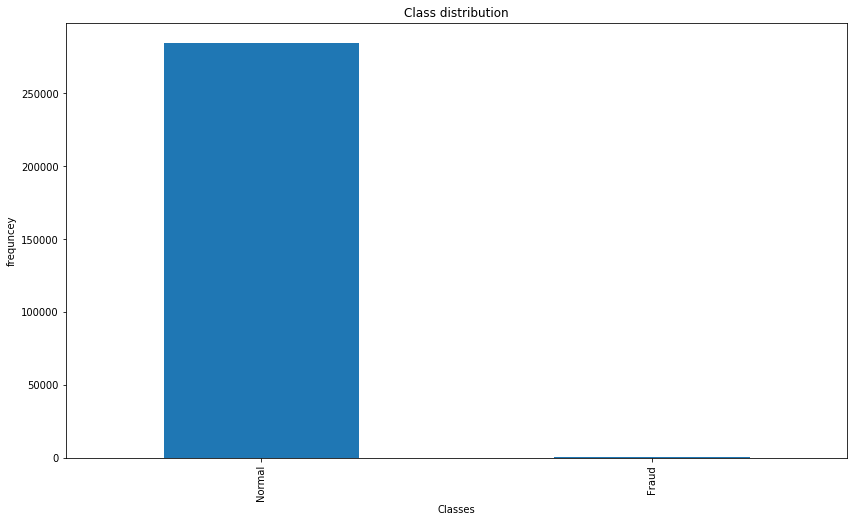

In [28]:
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar')
plt.title('Class distribution')
plt.xticks(range(2),LABELS)
plt.xlabel('Classes')
plt.ylabel('frequncey')

In [29]:
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

In [30]:
over_sampling=SMOTETomek(random_state=42)
#X_res,Y_res=over_sampling.fit_sample(X,Y)

In [31]:
data['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [42]:
data_mod=data.copy() 
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing
scalar=StandardScaler()

In [43]:
data_mod['NormalizedAmount']=scalar.fit_transform(data['Amount'].values.reshape(-1,1))

In [49]:
data_mod['NormalizedAmount'].std()

1.0000017555792826

In [50]:
# draw correlation matrix
corr=data.corr()

In [51]:
import seaborn as sns

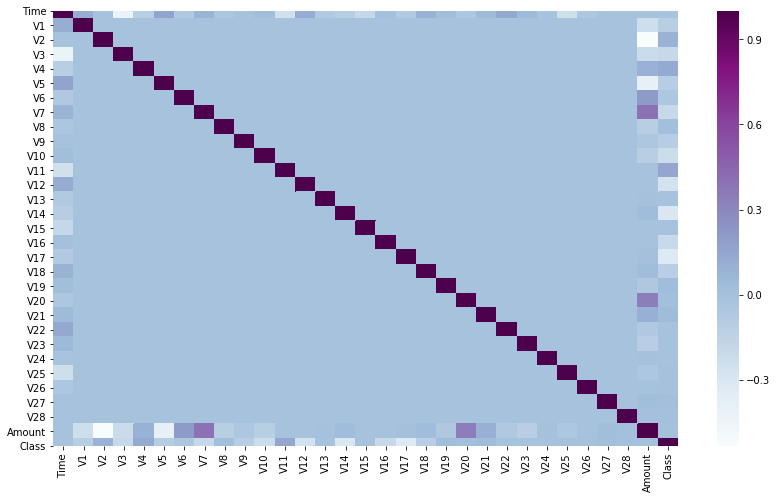

In [52]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='BuPu')